In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN

In [2]:
df = pd.read_csv('../data/prepared_data.csv')
df.head()

,ownerSex,ownerBirthday,accountCreationDate,isShared,balance,loanDate,loanDuration,loanPayments,loanAmount,ratio,...,hasCard,frequency_monthly issuance,frequency_weekly issuance,region_central Bohemia,region_east Bohemia,region_north Bohemia,region_north Moravia,region_south Bohemia,region_south Moravia,region_west Bohemia
0,-1.012270,-0.931052,-1.211538,-0.544466,-1.010027,-2.018768,-1.427574,1.772411,-0.465450,-0.482057,...,-0.18628,-1.937427,2.330531,-0.372678,-0.356578,-0.311432,-0.429087,-0.317287,-0.492366,3.095262
1,0.987878,0.745626,-1.311755,-0.544466,0.502277,-2.001859,0.008758,0.209593,0.196517,0.387419,...,-0.18628,0.516148,-0.429087,-0.372678,2.804437,-0.311432,-0.429087,-0.317287,-0.492366,-0.323074
2,0.987878,-1.819991,-1.325297,-0.544466,-1.001889,-1.953950,1.445091,-0.928164,-0.173463,-0.026395,...,-0.18628,0.516148,-0.429087,-0.372678,2.804437,-0.311432,-0.429087,-0.317287,-0.492366,-0.323074
3,-1.012270,-1.510053,-1.349674,-0.544466,-0.340875,-1.937040,0.008758,-0.553325,-0.375924,-0.296772,...,-0.18628,0.516148,-0.429087,2.683282,-0.356578,-0.311432,-0.429087,-0.317287,-0.492366,-0.323074
4,0.987878,1.554129,-1.309046,-0.544466,-0.018923,-1.841222,1.445091,0.195440,1.231662,0.570926,...,-0.18628,-1.937427,2.330531,-0.372678,-0.356578,-0.311432,-0.429087,-0.317287,-0.492366,-0.323074


In [32]:
X, y = df[['balance', 'timesIntoNegativeBalance', 'numTransactionsNegBalance']], df['status']

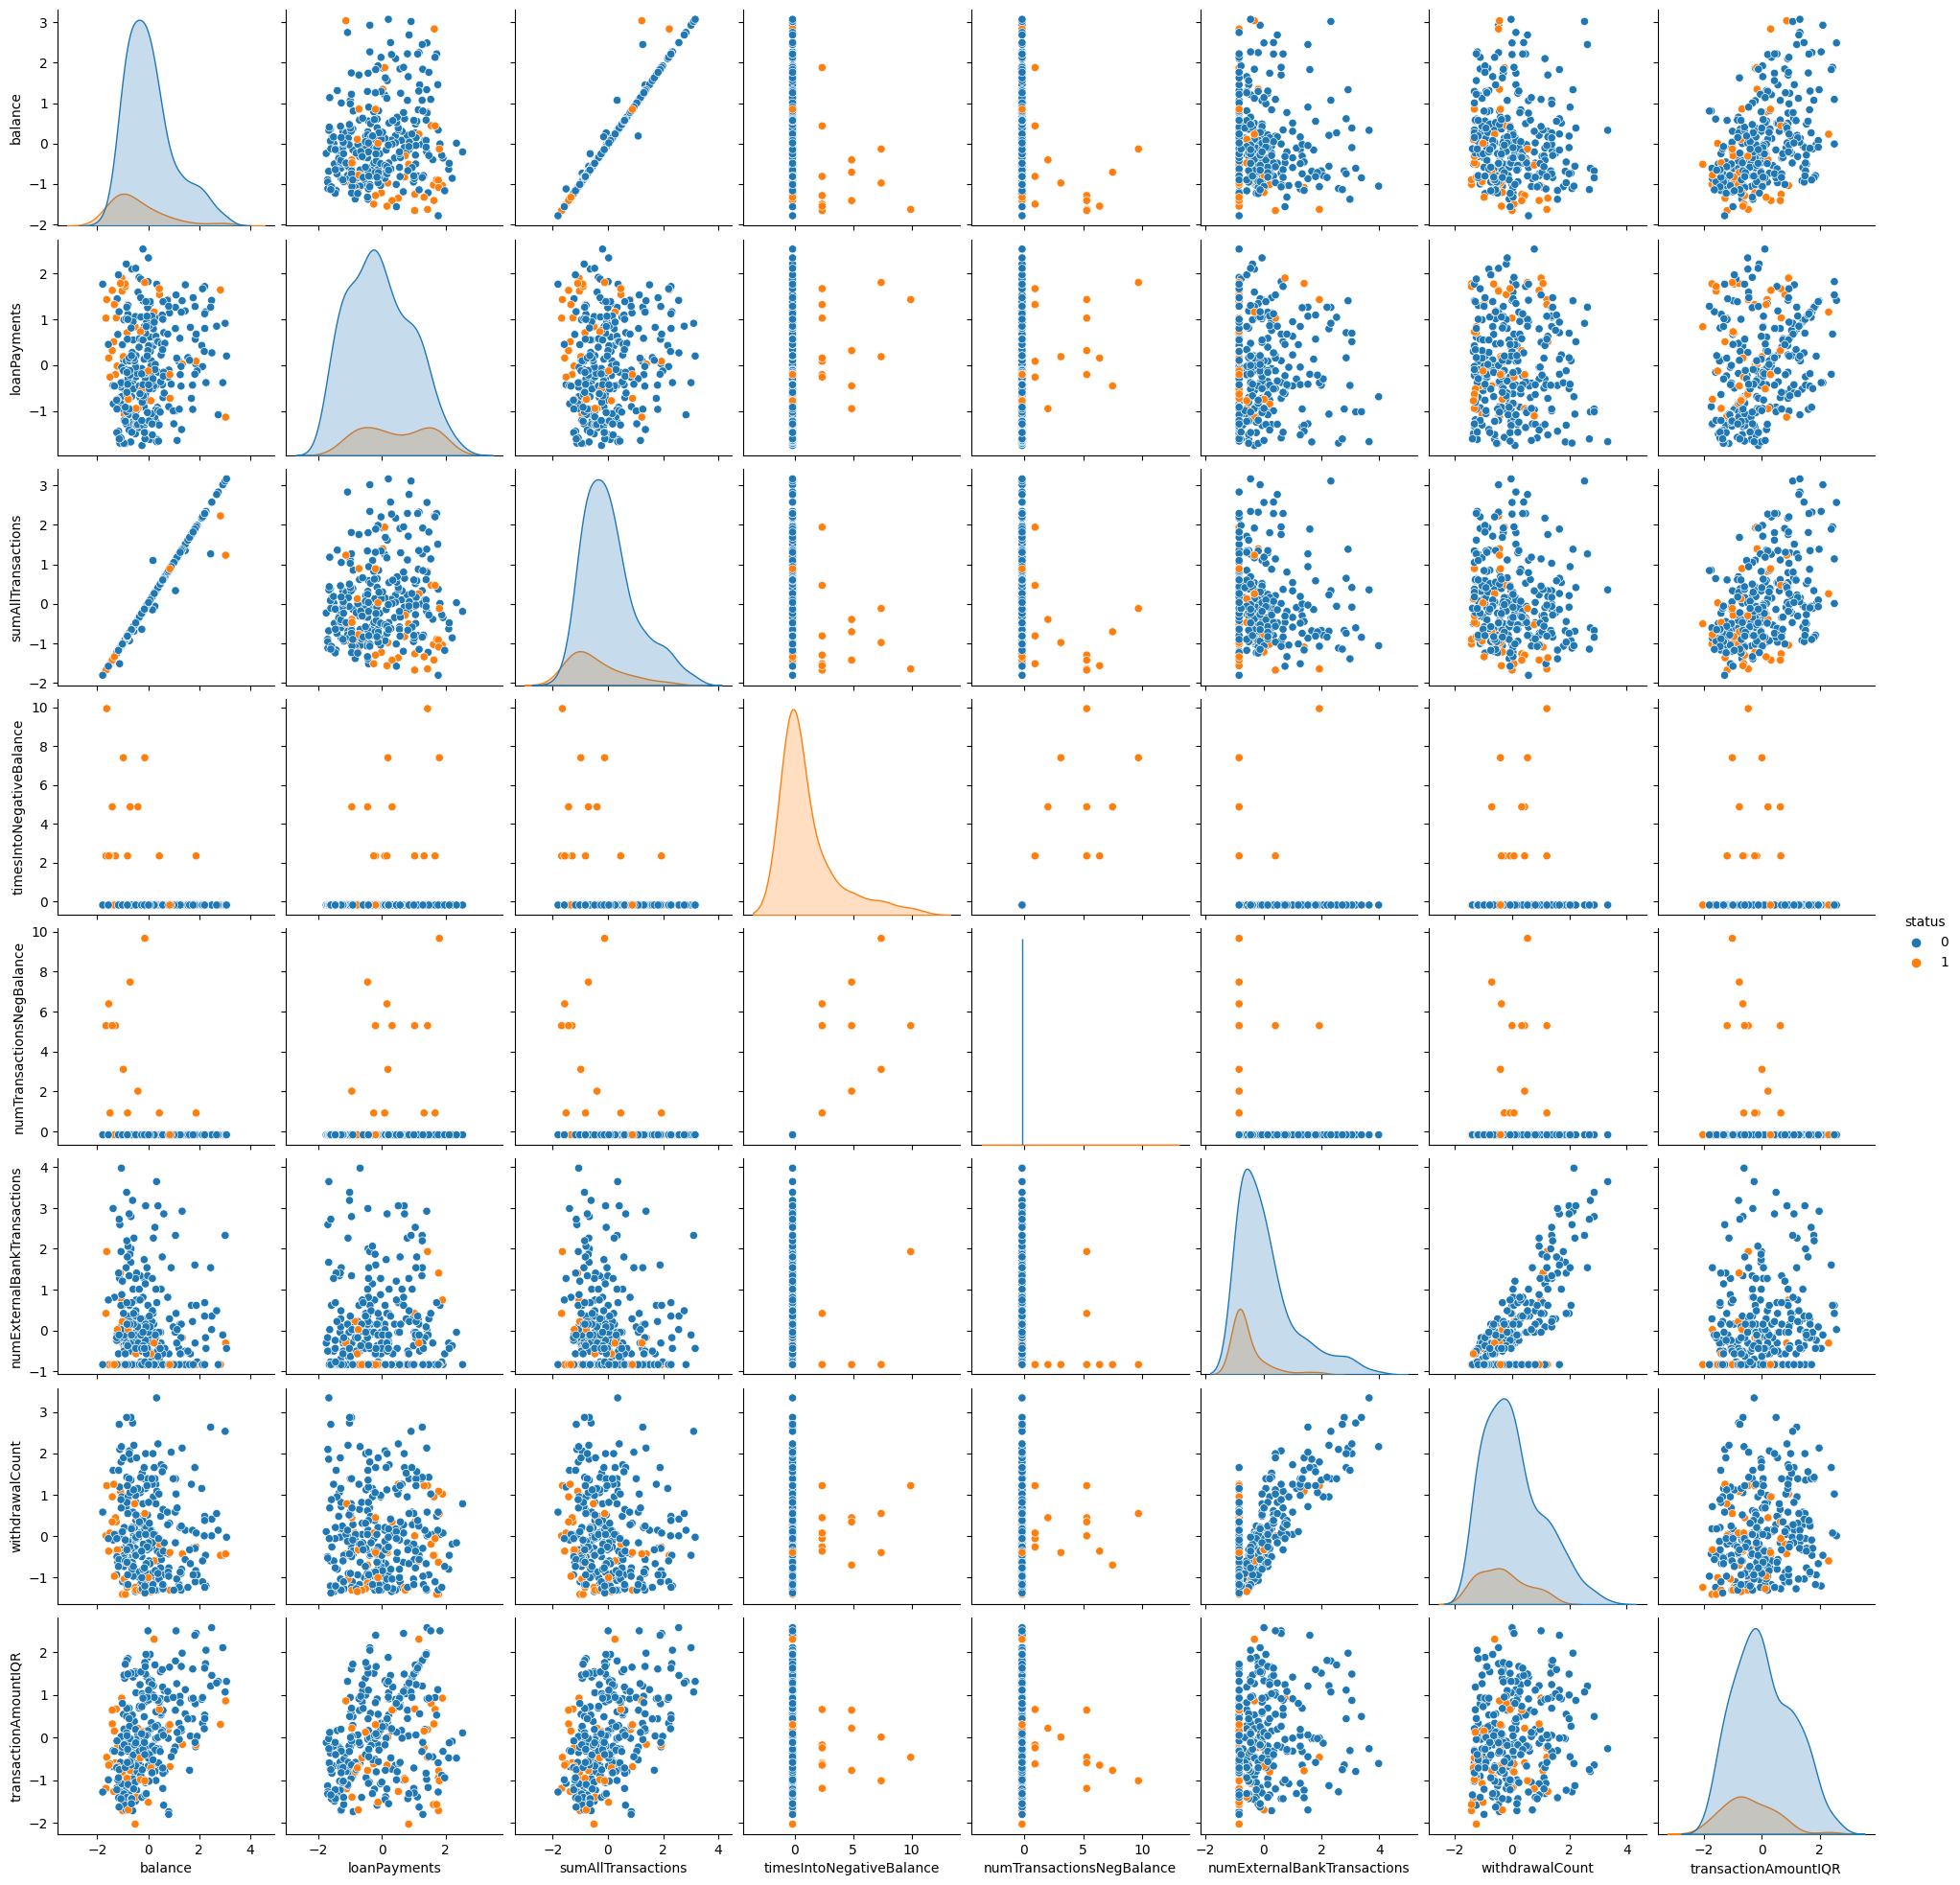

In [16]:
sns.pairplot(data=df[['balance', 'loanPayments', 'sumAllTransactions',
       'timesIntoNegativeBalance', 'numTransactionsNegBalance',
       'numExternalBankTransactions', 'withdrawalCount',
       'transactionAmountIQR', 'status']], hue="status")

In [17]:
pca = PCA(n_components=2)
X_r = pca.fit_transform(X)
pca_df = pd.DataFrame(data = X_r, columns=['pc1', 'pc2'])
pca_df = pd.concat([pca_df, df[['status']]], axis = 1)

In [18]:
pca_df.head()

,pc1,pc2,status
0,0.567041,-1.871778,1
1,-0.529591,0.558857,0
2,0.352726,-1.324009,0
3,0.010326,-0.612893,0
4,-0.707130,1.146261,0


<AxesSubplot: xlabel='pc1', ylabel='pc2'>

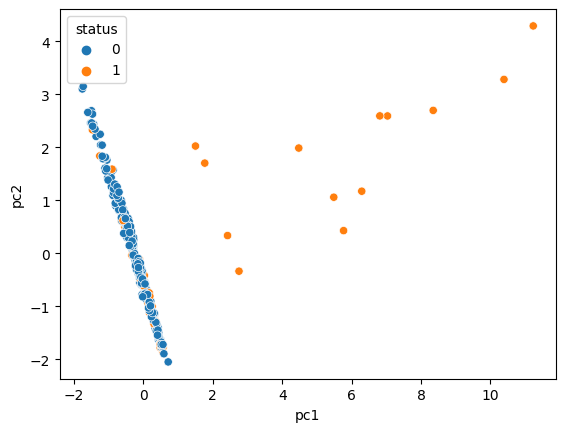

In [19]:
sns.scatterplot(data=pca_df, x='pc1', y='pc2', hue='status')

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0
  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0
  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0 -1  0  0  0
 -1  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0 -1  0  0  0  0  0 -1  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]


0.7242046559423152

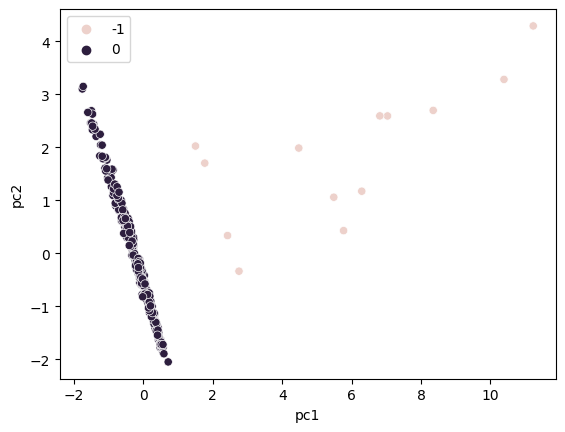

In [21]:
dbscan = DBSCAN(eps=1.6, min_samples=5)
dbscan.fit_predict(X)
print(dbscan.labels_)
sns.scatterplot(data=pca_df, x='pc1', y='pc2', hue=dbscan.labels_)
from sklearn.metrics import silhouette_score
silhouette_score(X, dbscan.labels_)

In [7]:
scaled_df = df.copy()
scaler = StandardScaler()
scaler.fit_transform(scaled_df)
scaled_df = pd.DataFrame(data=scaler.fit_transform(scaled_df), columns=df.columns)

<AxesSubplot: xlabel='pc1', ylabel='pc2'>

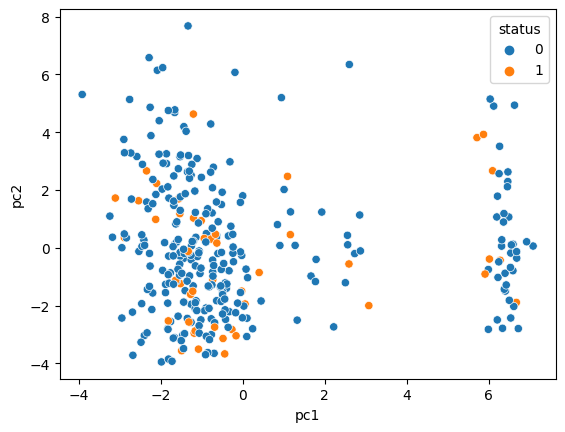

In [8]:
pca = PCA(n_components=2,svd_solver='full')
X, y = scaled_df.drop('status',axis=1), scaled_df['status']
X_r = pca.fit_transform(X)
pca_df = pd.DataFrame(data = X_r, columns=['pc1', 'pc2'])
pca_df = pd.concat([pca_df, df[['status']]], axis = 1)
sns.scatterplot(data=pca_df, x='pc1', y='pc2', hue='status')

In [ ]:
3